In [35]:
import matplotlib.pyplot as plt
import pandas as pd

from data_process.utils import get_country_iso_code

In [12]:
df = pd.read_csv("2021-11-30T16:20:31.538524_general_long term (yearly data).csv", index_col = 0)
df.head(5)

,YearlyChange_people_fully_vaccinatedRank,YearlyChange_total_casesRank,YearlyChange_total_deathsRank,vaccinated_rateRank,YearlyGdpChangeRank,QGDPRank,YearlyInflationRank,YearlyChangeIMPRank,IMPRank,YearlyChangeEXPRank,EXPRank,YearlyChangeNTRADERank,NTRADERank,YearlyUnemploymentRateChangeRank,YearlyUnemploymentRateRank,GdpTradeCompRank,Overall Rank
Japan,46.0,20.0,32.0,17.0,46.0,46.0,10.0,15.0,4.0,29.0,5.0,6.0,41.0,19.0,2.0,43,1
Indonesia,53.0,15.0,22.0,139.0,38.0,8.0,28.0,34.0,23.0,16.0,21.0,8.0,12.0,NaN,NaN,14,2
Italy,48.0,82.0,51.0,30.0,36.0,43.0,56.0,21.0,10.0,33.0,7.0,39.0,11.0,1.0,31.0,11,3
France,17.0,92.0,49.0,40.0,39.0,36.0,46.0,16.0,6.0,28.0,8.0,31.0,43.0,3.0,26.0,44,4
Czech Republic,NaN,NaN,NaN,NaN,42.0,25.0,122.0,39.0,22.0,39.0,23.0,36.0,18.0,28.0,1.0,19,5


In [13]:
df.index[:10]

Index(['Japan', 'Indonesia', 'Italy', 'France', 'Czech Republic', 'Sweden',
       'Saudi Arabia', 'Chile', 'Portugal', 'Spain'],
      dtype='object')

# covid data

In [30]:
covid = pd.read_csv("data/covid/owid-covid-data.csv")
covid = covid[covid["location"].isin(df.index[:10].tolist())]
covid["vaccinated_rate"] = covid["people_fully_vaccinated"] / covid["population"]
covid.head(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,vaccinated_rate
24471,CHL,South America,Chile,2020-02-23,2.0,2.0,NaN,NaN,NaN,NaN,...,41.5,NaN,2.11,80.18,0.851,205.0,1.3,-3.54,10.670213,NaN
24472,CHL,South America,Chile,2020-02-24,2.0,0.0,NaN,NaN,NaN,NaN,...,41.5,NaN,2.11,80.18,0.851,NaN,NaN,NaN,NaN,NaN
24473,CHL,South America,Chile,2020-02-25,2.0,0.0,NaN,NaN,NaN,NaN,...,41.5,NaN,2.11,80.18,0.851,NaN,NaN,NaN,NaN,NaN
24474,CHL,South America,Chile,2020-02-26,2.0,0.0,NaN,NaN,NaN,NaN,...,41.5,NaN,2.11,80.18,0.851,NaN,NaN,NaN,NaN,NaN
24475,CHL,South America,Chile,2020-02-27,2.0,0.0,NaN,NaN,NaN,NaN,...,41.5,NaN,2.11,80.18,0.851,NaN,NaN,NaN,NaN,NaN


In [18]:
covid.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [17]:
covid.pivot?

Signature: covid.pivot(index=None, columns=None, values=None) -> 'DataFrame'
Docstring:
Return reshaped DataFrame organized by given index / column values.

Reshape data (produce a "pivot" table) based on column values. Uses
unique values from specified `index` / `columns` to form axes of the
resulting DataFrame. This function does not support data
aggregation, multiple values will result in a MultiIndex in the
columns. See the :ref:`User Guide <reshaping>` for more on reshaping.

Parameters
----------
index : str or object or a list of str, optional
    Column to use to make new frame's index. If None, uses
    existing index.

    .. versionchanged:: 1.1.0
       Also accept list of index names.

columns : str or object or a list of str
    Column to use to make new frame's columns.

    .. versionchanged:: 1.1.0
       Also accept list of columns names.

values : str, object or a list of the previous, optional
    Column(s) to use for populating new frame's values. If not
    specif

location,Chile,France,Indonesia,Italy,Japan,Portugal,Saudi Arabia,Spain,Sweden
date,,,,,,,,,
2020-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-24,NaN,0.044,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2021-11-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
f.set?

Signature: f.set(**kwargs)
Docstring: A property batch setter.  Pass *kwargs* to set properties.
File:      ~/opt/anaconda3/lib/python3.8/site-packages/matplotlib/artist.py
Type:      method


In [74]:
def plot(df, column, datecol = "date", loccol = "location", title = None, savepath = None, ylabel = None):
    plot_df = df.pivot(index = datecol, columns = loccol, values = column)
    f = plot_df.plot.line()
    f.figure.set_size_inches(12, 8)
    
    if bool(title):
        f.set_title(title)
    
    if bool(ylabel):
        f.set_ylabel(ylabel)
    
    if savepath is not None:
        f.figure.savefig(savepath)

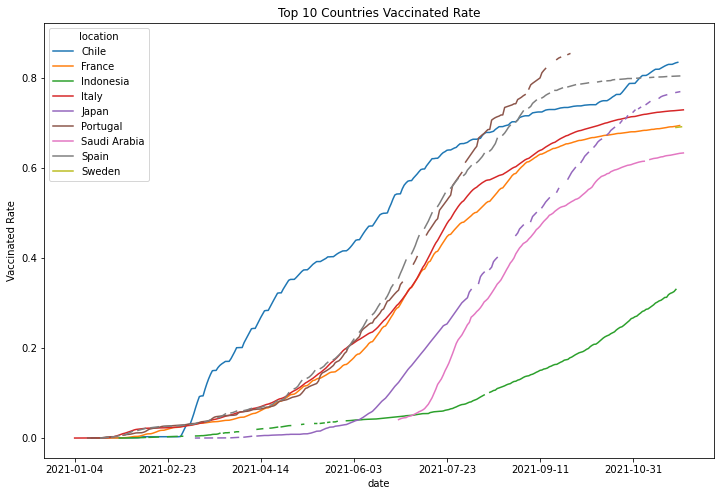

In [75]:
plot(covid, "vaccinated_rate", title = "Top 10 Countries Vaccinated Rate", ylabel = "Vaccinated Rate", savepath = "Top10_vac_rate.png")

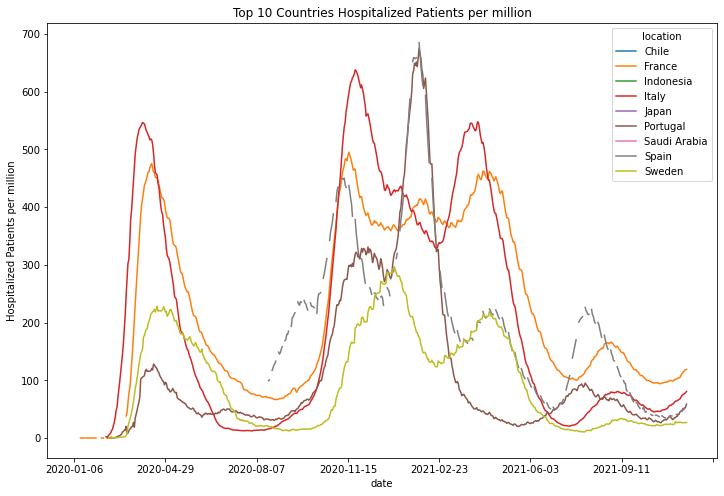

In [76]:
plot(covid, "hosp_patients_per_million", title = "Top 10 Countries Hospitalized Patients per million", ylabel = "Hospitalized Patients per million",
    savepath = "Top10_HospPerMillion.png")

# Trade

In [ ]:
country_ref = get_country_iso_code()
country_ref = country_ref[country_ref.isin(df.index[:10])]

In [82]:
trade = pd.read_csv("data/trade/DP_LIVE_29112021095659819.csv")
trade = trade[trade["TIME"].str.contains("20[12][0-9]")]
exp = trade.loc[trade["LOCATION"].isin(country_ref.index) 
                  & (trade["SUBJECT"] == "EXP")
                   & (trade["MEASURE"] == "BLN_USD")
                   & (trade["FREQUENCY"] == "M")]
imp = trade.loc[trade["LOCATION"].isin(country_ref.index) 
                  & (trade["SUBJECT"] == "IMP")
                   & (trade["MEASURE"] == "BLN_USD")
                   & (trade["FREQUENCY"] == "M")]
NTRADE = trade.loc[trade["LOCATION"].isin(country_ref.index) 
                  & (trade["SUBJECT"] == "NTRADE")
                   & (trade["MEASURE"] == "BLN_USD")
                  & (trade["FREQUENCY"] == "M")]

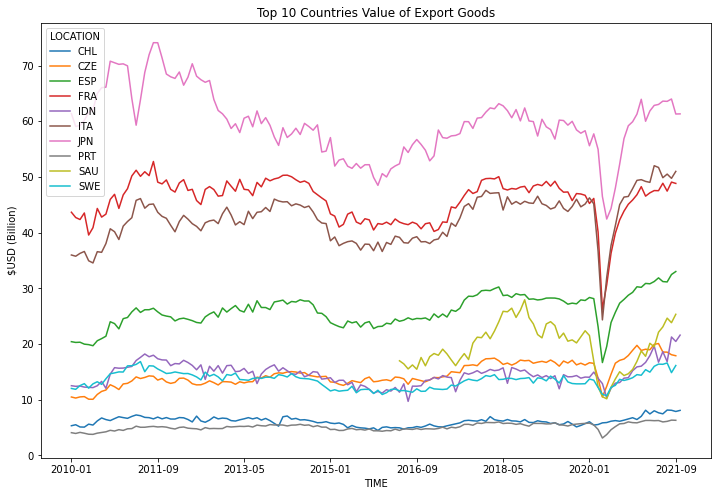

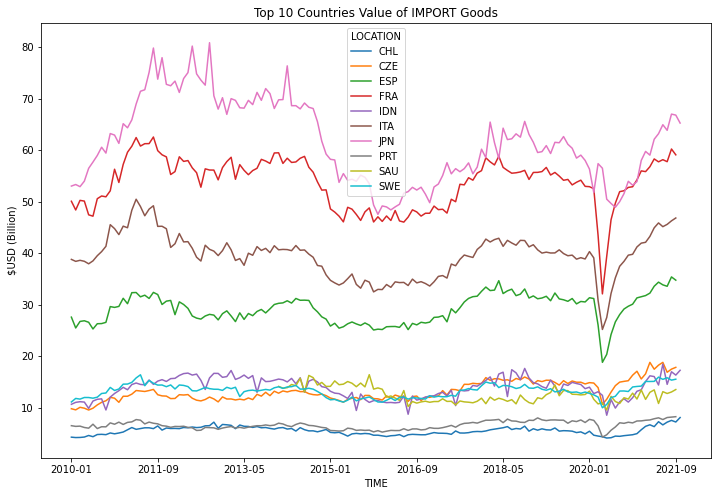

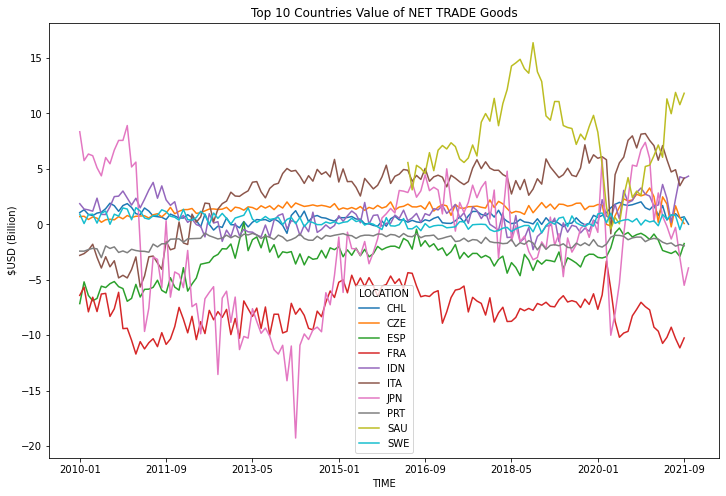

In [86]:
plot(exp, "Value", datecol = "TIME", loccol = "LOCATION", title = "Top 10 Countries Value of Export Goods", ylabel = "$USD (Billion)",
    savepath = "Top10_export.png")
plot(imp, "Value", datecol = "TIME", loccol = "LOCATION", title = "Top 10 Countries Value of IMPORT Goods", ylabel = "$USD (Billion)",
    savepath = "Top10_import.png")
plot(NTRADE, "Value", datecol = "TIME", loccol = "LOCATION", title = "Top 10 Countries Value of NET TRADE Goods", ylabel = "$USD (Billion)",
    savepath = "Top10_ntrade.png")